In [1]:
from google.colab import files
uploaded = files.upload()

Saving expedia.csv to expedia.csv
Saving kayak.csv to kayak.csv
Saving momondo.csv to momondo.csv


In [2]:
import pandas as pd

df1 = pd.read_csv("/content/kayak.csv")
df2 = pd.read_csv("/content/momondo.csv")
df3 = pd.read_csv("/content/expedia.csv")


In [3]:
df1['website'] = 'www.kayak.com'
df2['website'] = 'www.momondo.com'
df3['website'] = 'www.expedia.com'


Preprocessing for df1

In [4]:
import re

def convert_time_to_hours(time_string):
  """Converts a time string to the number of hours, ignoring whatever is after "h".

  Args:
    time_string: A string representing the time.

  Returns:
    An integer representing the number of hours.
  """
  if time_string != 'none':
      split_string = re.search(r'(\d+)h', time_string)
      if split_string:
          hours = int(split_string.group(1))
      else:
          hours = 0
      return int(hours)
  else:
      return 0


df1['flight_duration'] = df1['duration'].apply(convert_time_to_hours)


def convert_time_to_hours(time_string):
  """Converts a time string to the number of hours, ignoring whatever is after "h".

  Args:
    time_string: A string representing the time.

  Returns:
    An integer representing the number of hours.
  """

  if time_string == 'nan':
      return int(0)
  if time_string:
      split_string = re.search(r'(\d+)h', time_string)
      if split_string:
          hours = int(split_string.group(1))
      else:
          hours = 0
      return int(hours)
  else:
      return 0

df1['layover_duration'] = df1['layover'].apply(convert_time_to_hours)
# df['layover'].head()


Preprocessing for df2

In [5]:
df2['layover'] = df2['layover'].fillna('none')

def convert_time_to_hours(time_string):
  """Converts a time string to the number of hours, ignoring whatever is after "h".

  Args:
    time_string: A string representing the time.

  Returns:
    An integer representing the number of hours.
  """
  if time_string != 'none':
      split_string = re.search(r'(\d+)h', time_string)
      if split_string:
          hours = int(split_string.group(1))
      else:
          hours = 0
      return int(hours)
  else:
      return 0


df2['flight_duration'] = df2['duration'].apply(convert_time_to_hours)

def convert_time_to_hours(time_string):
  """Converts a time string to the number of hours, ignoring whatever is after "h".

  Args:
    time_string: A string representing the time.

  Returns:
    An integer representing the number of hours.
  """

  if time_string == 'none' or time_string =="nan":
      return int(0)
  if time_string:
      split_string = re.search(r'(\d+)h', time_string)
      if split_string:
          hours = int(split_string.group(1))
      else:
          hours = 0
      return int(hours)
  else:
      return 0

df2['layover_duration'] = df2['layover'].apply(convert_time_to_hours)
# df['layover'].head()

Preprocessing for df3


In [6]:
def convert_time_to_hours(time_string):
  """Converts a time string to the number of hours, ignoring whatever is after "h".

  Args:
    time_string: A string representing the time.

  Returns:
    An integer representing the number of hours.
  """

  split_string = time_string.split("h")
  hours = split_string[0]
  return hours


df3['flight_duration'] = df3['duration'].apply(convert_time_to_hours)

# Use str.replace to change the format of the 'Arrival Time' column
df3['arrival'] = df3['arrival'].str.replace(r'(\d{1,2})([APap][Mm])', r'\1 \2')
df3['departure'] = df3['departure'].str.replace(r'(\d{1,2})([APap][Mm])', r'\1 \2')

# Function to convert duration strings
def convert_duration(duration):
    parts = duration.split()  # Split the string into parts
    hours = '0h'
    minutes = '0m'

    # Extract hours and minutes if they exist in the parts
    if 'hours' in parts:
        hours = parts[parts.index('hours') - 1] + 'h'
    if 'minutes' in parts:
        minutes = parts[parts.index('minutes') - 1] + 'm'

    return hours + ' ' + minutes  # Combine hours and minutes

# Apply the conversion function to the DataFrame
df3['duration'] = df3['duration'].apply(convert_duration)



# Define a function to transform the values
def transform_duration(duration_str):
    if pd.notna(duration_str) and duration_str != 'NaN':
        # Replace "hours" and "hour" with "h" and "minutes" with "m"
        duration_str = duration_str.replace(' hours', 'h').replace(' hour', 'h').replace(' minutes', 'm')
        # Replace "minute" with "m" if there's just one minute
        duration_str = duration_str.replace(' 1 m', ' 1m')
    else:
        duration_str = 'none'  # Replace NaN with "none"
    return duration_str

# Apply the transformation to the DataFrame column
df3['layover'] = df3['layover'].apply(transform_duration)

df3['layover_city'] = df3['layover_city'].fillna('none')


def convert_time_to_hours(time_string):
  """Converts a time string to the number of hours, ignoring whatever is after "h".

  Args:
    time_string: A string representing the time.

  Returns:
    An integer representing the number of hours.
  """
  if time_string != 'none':
      split_string = re.search(r'(\d+)h', time_string)
      if split_string:
          hours = int(split_string.group(1))
      else:
          hours = 0
      return int(hours)
  else:
      return 0


df3['flight_duration'] = df3['duration'].apply(convert_time_to_hours)

def convert_time_to_hours(time_string):
  """Converts a time string to the number of hours, ignoring whatever is after "h".

  Args:
    time_string: A string representing the time.

  Returns:
    An integer representing the number of hours.
  """

  if time_string == 'nan':
      return int(0)
  if time_string:
      split_string = re.search(r'(\d+)h', time_string)
      if split_string:
          hours = int(split_string.group(1))
      else:
          hours = 0
      return int(hours)
  else:
      return 0

df3['layover_duration'] = df3['layover'].apply(convert_time_to_hours)
# df['layover'].head()

<ipython-input-6-cac2df2321ce>:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df3['arrival'] = df3['arrival'].str.replace(r'(\d{1,2})([APap][Mm])', r'\1 \2')
<ipython-input-6-cac2df2321ce>:20: FutureWarning: The default value of regex will change from True to False in a future version.
  df3['departure'] = df3['departure'].str.replace(r'(\d{1,2})([APap][Mm])', r'\1 \2')


**EDA**

In [7]:
df = pd.concat([df1,df2,df3])
len(df)

308

In [8]:
df.describe()

,stops,prices,flight_duration,layover_duration
count,308.000000,308.000000,308.000000,308.000000
mean,1.464286,450.581169,8.607143,2.733766
std,0.616302,295.822273,3.752725,2.904657
min,0.000000,96.000000,3.000000,0.000000
25%,1.000000,265.000000,6.000000,1.000000
50%,2.000000,403.500000,8.000000,2.000000
75%,2.000000,569.250000,11.000000,4.000000
max,3.000000,2972.000000,38.000000,20.000000


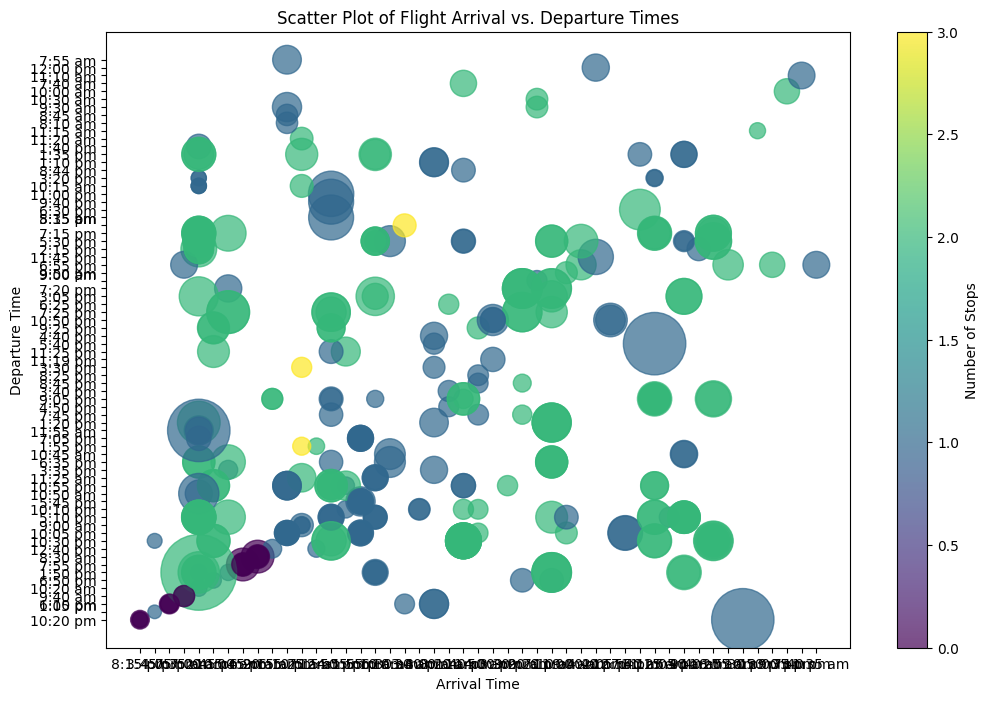

In [9]:
import matplotlib.pyplot as plt


# Create a scatter plot
plt.figure(figsize=(12, 8))

# Use 'arrival' on the x-axis and 'departure' on the y-axis
plt.scatter(df['arrival'], df['departure'], c=df['stops'], s=df['prices'], cmap='viridis', alpha=0.7)

# Add labels and color bar
plt.xlabel('Arrival Time')
plt.ylabel('Departure Time')
plt.title('Scatter Plot of Flight Arrival vs. Departure Times')

# Add a color bar legend for 'stops' (number of stops)
cbar = plt.colorbar()
cbar.set_label('Number of Stops')

# Show the plot
plt.show()

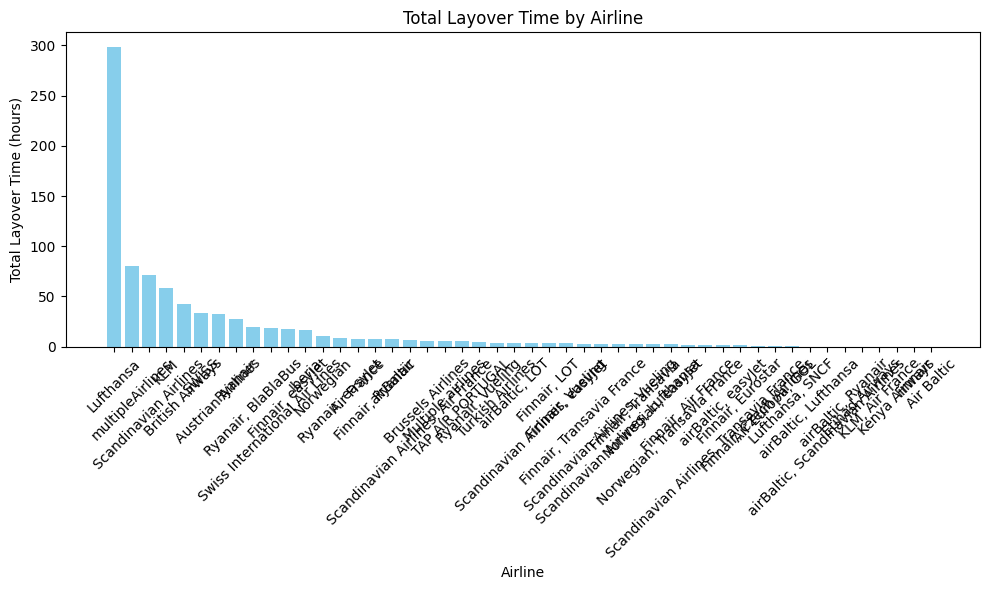

In [10]:
# Group the data by airline and calculate the total layover time for each airline
layover_by_airline = df.groupby('airline')['layover_duration'].sum().reset_index()

# Sort the airlines by total layover time (descending order)
layover_by_airline = layover_by_airline.sort_values(by='layover_duration', ascending=False)

# Create a bar graph to compare airlines by total layover time
plt.figure(figsize=(10, 6))
plt.bar(layover_by_airline['airline'], layover_by_airline['layover_duration'], color='skyblue')
plt.xlabel('Airline')
plt.ylabel('Total Layover Time (hours)')
plt.title('Total Layover Time by Airline')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the graph
plt.show()

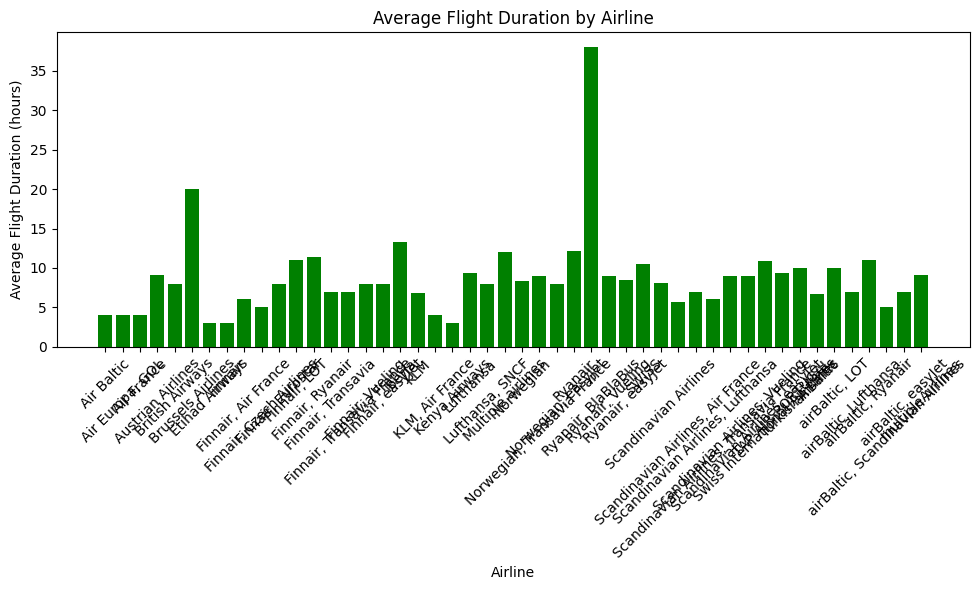

In [11]:
# Group the data by airline and calculate the average flight duration for each airline
average_duration_by_airline = df.groupby('airline')['flight_duration'].mean().reset_index()

# Create a bar graph to plot the average flight duration by airline
plt.figure(figsize=(10, 6))
plt.bar(average_duration_by_airline['airline'], average_duration_by_airline['flight_duration'], color='green')
plt.xlabel('Airline')
plt.ylabel('Average Flight Duration (hours)')
plt.title('Average Flight Duration by Airline')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the graph
plt.show()

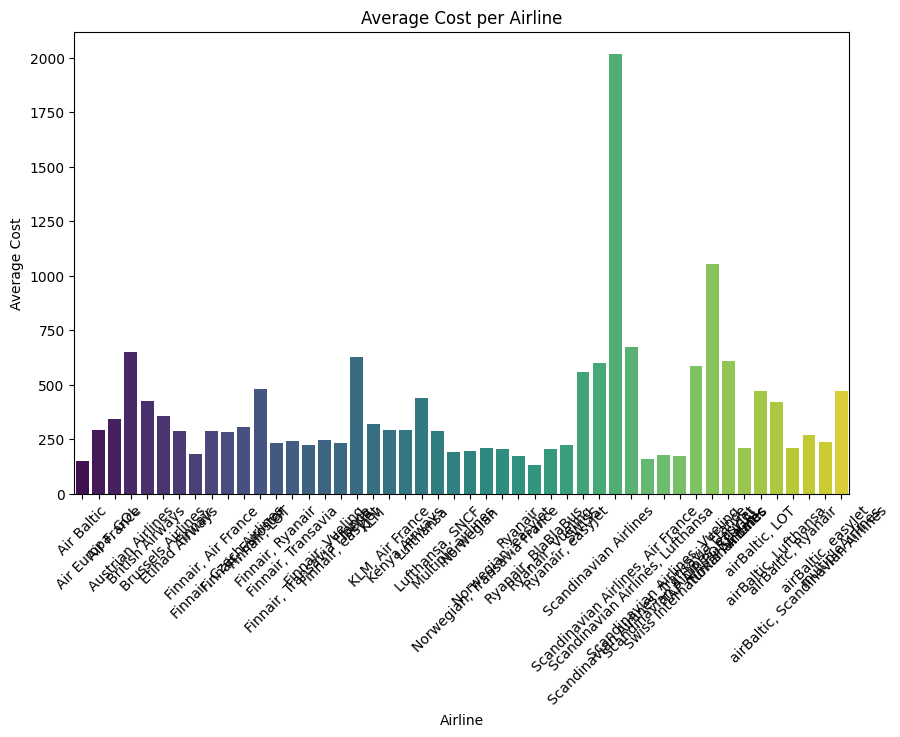

In [12]:
import seaborn as sns

# Get the average cost for all airlines
average_cost = df.groupby('airline')['prices'].mean()

# Create a seaborn bar plot to visualize the average cost for each airline
plt.figure(figsize=(10, 6))
sns.barplot(x=average_cost.index, y=average_cost.values, data=df,  palette='viridis')
plt.xlabel('Airline')
plt.ylabel('Average Cost')
plt.title('Average Cost per Airline')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()


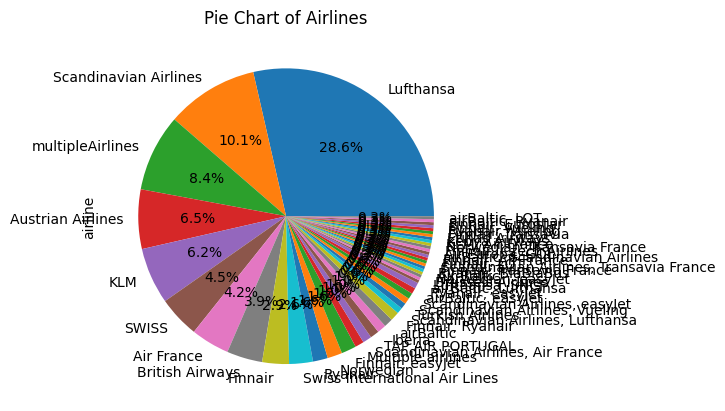

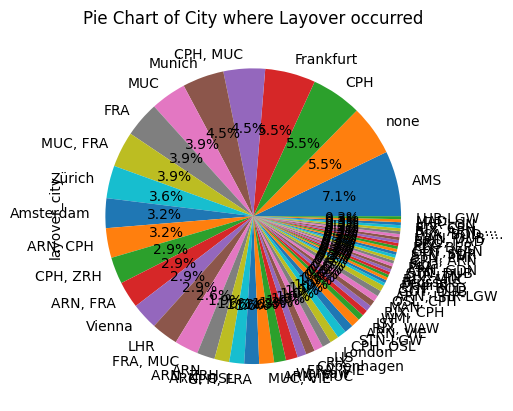

In [13]:
df['airline'].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.title("Pie Chart of Airlines")
plt.show()

df['layover_city'].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.title("Pie Chart of City where Layover occurred")
plt.show()

Arrival Time with the Most Airlines:
   Hour AM/PM  Count
2     7    AM     68


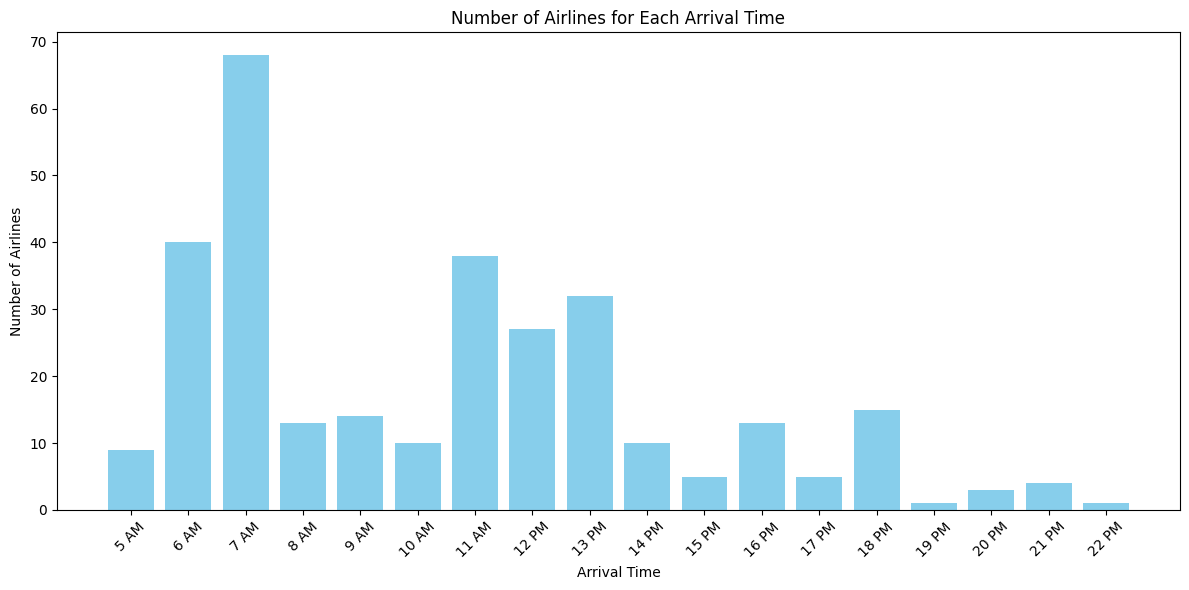

In [14]:


# Assuming you have a DataFrame called 'df' with a column 'arrival_time' containing arrival times
# Example DataFrame:
# df = pd.DataFrame({'arrival_time': ['7:00 am', '8:30 am', '7:00 am', '9:45 am', '8:30 am']})

# Extract the hour and AM/PM information from the 'arrival_time' column
df['Hour'] = pd.to_datetime(df['arrival']).dt.hour
df['AM/PM'] = pd.to_datetime(df['arrival']).dt.strftime('%p')

# Group the data by hour and AM/PM and count the number of airlines for each group
arrival_counts = df.groupby(['Hour', 'AM/PM']).size().reset_index(name='Count')

# Find the arrival time with the most airlines
most_airlines_arrival = arrival_counts[arrival_counts['Count'] == arrival_counts['Count'].max()]

# Print the result
print("Arrival Time with the Most Airlines:")
print(most_airlines_arrival)

# Create a bar graph to visualize the number of airlines for each arrival time
plt.figure(figsize=(12, 6))
x_labels = arrival_counts['Hour'].astype(str) + ' ' + arrival_counts['AM/PM']
plt.bar(x_labels, arrival_counts['Count'], color='skyblue')
plt.xlabel('Arrival Time')
plt.ylabel('Number of Airlines')
plt.title('Number of Airlines for Each Arrival Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the graph
plt.show()


In [15]:
# User input for flight preferences
min_price = float(input("Enter minimum price (Euro): "))
max_price = float(input("Enter maximum price (Euro): "))
max_trip_duration = float(input("Enter maximum trip duration (hours): "))
max_stops = input("Enter the number of your maximum preferred stops: ")



# Filter flights based on user preferences
filtered_df = df[(df['prices'] >= min_price) & (df['prices'] <= max_price)
                 & (df['flight_duration'] <= max_trip_duration)
                 & (df['stops'] <= max_trip_duration)
                ]

def sort_dataframe_by_time(df, time_column):
    # Convert the time column to a timedelta object
    df['new '] = pd.to_timedelta(df[time_column])

    # Sort the DataFrame by the time column
    df.sort_values(by=[time_column], inplace=True)

    # Reset the DataFrame index after sorting
    df.reset_index(drop=True, inplace=True)

    return df

# User input to choose sorting criteria
print("\nChoose sorting criteria:")
print("1. Sort by Price")
print("2. Sort by Trip Duration")
sort_option = int(input("Enter your choice (1 or 2): "))

# Sort flights based on chosen criteria
if sort_option == 1:
    sorted_df = filtered_df.sort_values(by='prices')
else:
    sorted_df = sort_dataframe_by_time(filtered_df, 'duration')

# Display sorted flights
print("\nSorted Flights:")

pd.set_option('display.max_rows', None)

print(sorted_df)

# Find the cheapest flight
cheapest_flight = sorted_df.sort_values(by='prices').iloc[0]
print("\nCheapest Flight:")
print("Airline:", cheapest_flight['airline'])
print("Total Duration:", cheapest_flight['duration'])
print("Direct Flight:", "Yes" if cheapest_flight['stops'] == 0 else "No")
if cheapest_flight['stops'] > 0:
    print("Layover City:", cheapest_flight['layover_city'])
    print("Layover Time:", cheapest_flight['layover'])
print("Aircraft Type:", cheapest_flight['airline'])
print("Website Name:", cheapest_flight['website'])
print("Total Cost (in euro):", cheapest_flight['prices'])


# Find the fastest flight
fastest_flight = sorted_df.sort_values(by='flight_duration').iloc[0]
print("\nFastest Flight:")
print("Airline:", fastest_flight['airline'])
print("Total Duration:", fastest_flight['duration'])
print("Direct Flight:", "Yes" if fastest_flight['stops'] == 0 else "No")
if fastest_flight['stops'] > 0:
    print("Layover City:", fastest_flight['layover_city'])
    print("Layover Time:", cheapest_flight['layover'])
print("Aircraft Type:", fastest_flight['airline'])
print("Website Name:", fastest_flight['website'])
print("Total Cost (in euro):", fastest_flight['prices'])


Enter minimum price (Euro): 12
Enter maximum price (Euro): 2000
Enter maximum trip duration (hours): 29
Enter the number of your maximum preferred stops: 1

Choose sorting criteria:
1. Sort by Price
2. Sort by Trip Duration
Enter your choice (1 or 2): 1

Sorted Flights:
      arrival  departure  stops  prices duration  \
1     3:45 pm  1:05 pm\n      1      96  22h 20m   
10    3:45 pm   10:30 pm      1     114   7h 45m   
2     7:00 am   10:15 am      1     118   4h 15m   
11    7:00 am    3:20 pm      1     118   9h 20m   
0     8:15 pm   10:20 pm      0     119   3h 05m   
1     7:00 am    3:20 pm      1     120   9h 20m   
0     7:00 am   10:15 am      1     120   4h 15m   
0     7:00 am   10:15 am      1     122   4h 15m   
5     2:45 pm    6:50 pm      1     129   5h 05m   
2    11:15 am    3:20 pm      1     134    5h 5m   
7     5:25 am    9:00 am      1     136   4h 35m   
4     7:00 am   10:20 am      1     137   4h 20m   
6    10:00 am    1:50 pm      1     137   4h 50m   
2